In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.preprocessing
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [10]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.copy()
Y = numeros['target']
print(np.shape(X))

(1797, 8, 8)


In [11]:
inputs = torch.autograd.Variable(torch.Tensor(X).float()).unsqueeze(1)
print(inputs.size())

torch.Size([1797, 1, 8, 8])


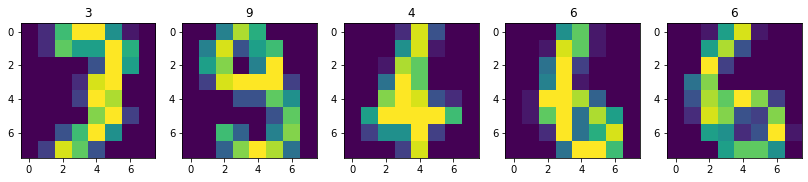

In [12]:
# muestra algunos ejemplos

n_items = inputs.data.size()[0]
random_items = np.random.choice(np.arange(n_items), 5)

plt.figure(figsize=(14,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    item  = random_items[i]
    plt.imshow(inputs[item][0].detach().numpy())
    plt.title(Y[item])

In [13]:
# normaliza
mean = inputs.mean(dim=0)
std = inputs.std(dim=0)
std[std==0]=1.0

for i in range(len(inputs)):
    inputs[i] = (inputs[i])/std
np.shape(inputs)


torch.Size([1797, 1, 8, 8])

In [14]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=3),
            torch.nn.Conv2d(16,8,kernel_size=3),
            torch.nn.Conv2d(8,4,kernel_size=3))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(4,8,kernel_size=3),
            torch.nn.ConvTranspose2d(8,16,kernel_size=3),
            torch.nn.ConvTranspose2d(16,1,kernel_size=3))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [41]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self,k1, k2, k3):
        super(Autoencoder,self).__init__()
        #k1=16; k2=8; k3=4
        self.k1=k1
        self.k2=k2
        self.k3=k3
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, k1, kernel_size=3),
            torch.nn.Conv2d(k1,k2,kernel_size=3),
            torch.nn.Conv2d(k2,k3,kernel_size=3))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(k3,k2,kernel_size=3),
            torch.nn.ConvTranspose2d(k2,k1,kernel_size=3),
            torch.nn.ConvTranspose2d(k1,1,kernel_size=3))
    def forward(self,x,k1, k2, k3):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

NameError: name 'k2' is not defined

In [45]:
# entrenamiento
# inicializa modelo, loss y optimizador
k2=8
k3=4
for k1 in [8,16]:
    num_epochs = 100
    model = Autoencoder(k1,k2,k3)
    print(model)
    distance = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1E-4)
    loss_list = [] 
    for epoch in range(num_epochs):
        output = model(inputs,k1,8,4)
        loss = distance(output, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())
        print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))
    np=0
    for m in model.parameters():
        np+=m.flatten().size()[0]
    print(np)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (2): Conv2d(8, 4, kernel_size=(3, 3), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ConvTranspose2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (2): ConvTranspose2d(8, 1, kernel_size=(3, 3), stride=(1, 1))
  )
)
epoch [1/100], loss:2.4360
epoch [2/100], loss:2.2727
epoch [3/100], loss:2.0557
epoch [4/100], loss:1.7871
epoch [5/100], loss:1.6233
epoch [6/100], loss:1.7040
epoch [7/100], loss:1.5177
epoch [8/100], loss:1.3956
epoch [9/100], loss:1.3682
epoch [10/100], loss:1.3512
epoch [11/100], loss:1.3108
epoch [12/100], loss:1.2503
epoch [13/100], loss:1.1903
epoch [14/100], loss:1.1552
epoch [15/100], loss:1.1401
epoch [16/100], loss:1.1089
epoch [17/100], loss:1.0631
epoch [18/100], loss:1.0309
epoch [19/100], loss:1.0165
epoch [20/100], loss:1.0104
epoch [

In [26]:
x_transform = model(inputs)
latent_space = model.encoder(inputs)
print(latent_space.size())

torch.Size([1797, 4, 2, 2])


3221
